<a href="https://colab.research.google.com/github/woodskd24/MS-Data-Science/blob/main/675Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project I - CS 675

**By: Kelsey Woods**

Mount to Drive

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install

In [81]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import

In [82]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [83]:
Telco = pd.read_csv("/content/drive/MyDrive/telco-customer-churn.csv")

In [84]:
Telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [85]:
Telco.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [86]:
Telco.cov()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,0.135875,0.149978,2.442062
tenure,0.149978,603.168108,183.196987
MonthlyCharges,2.442062,183.196987,905.410934


1- Prep the data in order to be ready to be fed to a model.

*   Look for missing, null, NaN records.
*   Find outliers
*   Transform data – all entries should be numeric



Remove Missing

In [87]:
while("" in Telco) :
    Telco.remove("")

print(Telco)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

Drop Null & NaN

In [88]:
Telco.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Transform

In [89]:
for col in Telco.columns:
    Telco.loc[Telco[col] == "Yes", col] = 1
    Telco.loc[Telco[col] == "No", col] = 0
    Telco.loc[Telco[col] == "Female", col] = 0
    Telco.loc[Telco[col] == "Male", col] = 1
    Telco.loc[Telco[col] == "No phone service", col] = 2
    Telco.loc[Telco[col] == "DSL", col] = 2
    Telco.loc[Telco[col] == "Fiber optic", col] = 3
    Telco.loc[Telco[col] == "No internet service", col] = 3
    Telco.loc[Telco[col] == "Month-to-month", col] = 3
    Telco.loc[Telco[col] == "One year", col] = 1
    Telco.loc[Telco[col] == "Two year", col] = 2
    Telco.loc[Telco[col] == "Electronic check", col] = 1
    Telco.loc[Telco[col] == "Mailed check", col] = 2
    Telco.loc[Telco[col] == "Bank transfer (automatic)", col] = 3
    Telco.loc[Telco[col] == "Credit card (automatic)", col] = 4

In [90]:
Telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,2,0,...,0,0,0,0,3,1,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,2,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,2,1,...,0,0,0,0,3,1,2,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,3,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,3,0,...,0,0,0,0,3,1,1,70.70,151.65,1


2. List all types of data, numeric, categorical, text.

In [91]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
Telco.shape

(7043, 21)

In [93]:
TC = Telco.drop(columns = "customerID")

In [94]:
TC[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']] = TC[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']].astype(int)
TC[['PaperlessBilling', 'PaymentMethod', 'Churn']] = TC[['PaperlessBilling', 'PaymentMethod', 'Churn']].astype(int)

In [95]:
TC[['MonthlyCharges']] =TC[['MonthlyCharges']].astype(int)

In [96]:
TC[['TotalCharges']] = TC[['TotalCharges']].apply(pd.to_numeric, errors='coerce')
#TC[['TotalCharges']] = TC[['TotalCharges']].round(0)
TC[['TotalCharges']] = TC[['TotalCharges']].fillna(0).astype(np.int64)

In [97]:
print(TC.dtypes)

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object


In [98]:
while("" in TC) :
    TC.remove("")

print(TC)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 2                2     

In [99]:
TC.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,0,1,0,0,0,0,3,1,1,29,29,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,2,56,1889,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,3,1,2,53,108,1
3,1,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,3,42,1840,0
4,0,0,0,0,2,1,0,3,0,0,0,0,0,0,3,1,1,70,151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,2,84,1990,0
7039,0,0,1,1,72,1,1,3,0,1,1,0,1,1,1,1,4,103,7362,0
7040,0,0,1,1,11,0,2,2,1,0,0,0,0,0,3,1,1,29,346,0
7041,1,1,1,0,4,1,1,3,0,0,0,0,0,0,3,1,2,74,306,1


In [100]:
for col in TC:
  print(TC[col].unique())

[0 1]
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
[0 1]
[2 0 1]
[2 3 0]
[0 1 3]
[1 0 3]
[0 1 3]
[0 1 3]
[0 1 3]
[0 1 3]
[3 1 2]
[1 0]
[1 2 3 4]
[ 29  56  53  42  70  99  89 104  49  18 100 103 105 113  20 106  55  90
  39  19  59  30  64  96  95  66  45  69  74  97  79  76  84  80 108  24
 107  54  94  75  78 111 110  25  50  62  33  82  21  98  57  91  31  85
  88  23  58  35  44  71 101  68  86  73  81  51 109 112 102  46  93  65
  48  40  83 115 114  41  61  60  67  72  87  92 116  52  43  28  63  47
  34  26  77  36  38 118 117  22  37]
[  29 1889  108 ... 1990 7362 6844]
[0 1]


3- Perform EDA on data.
Present dependencies and correlations among the various features in the data. 
List the most important variables (Feature Importance) that will affect the target label.

In [101]:
%matplotlib inline

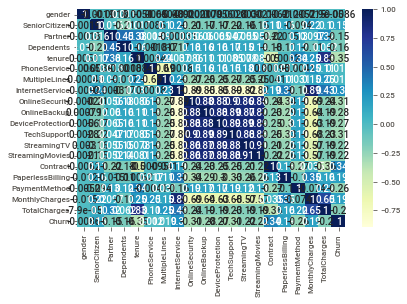

In [102]:
dataplot = sns.heatmap(TC.corr(), cmap="YlGnBu", annot=True)
dataplot

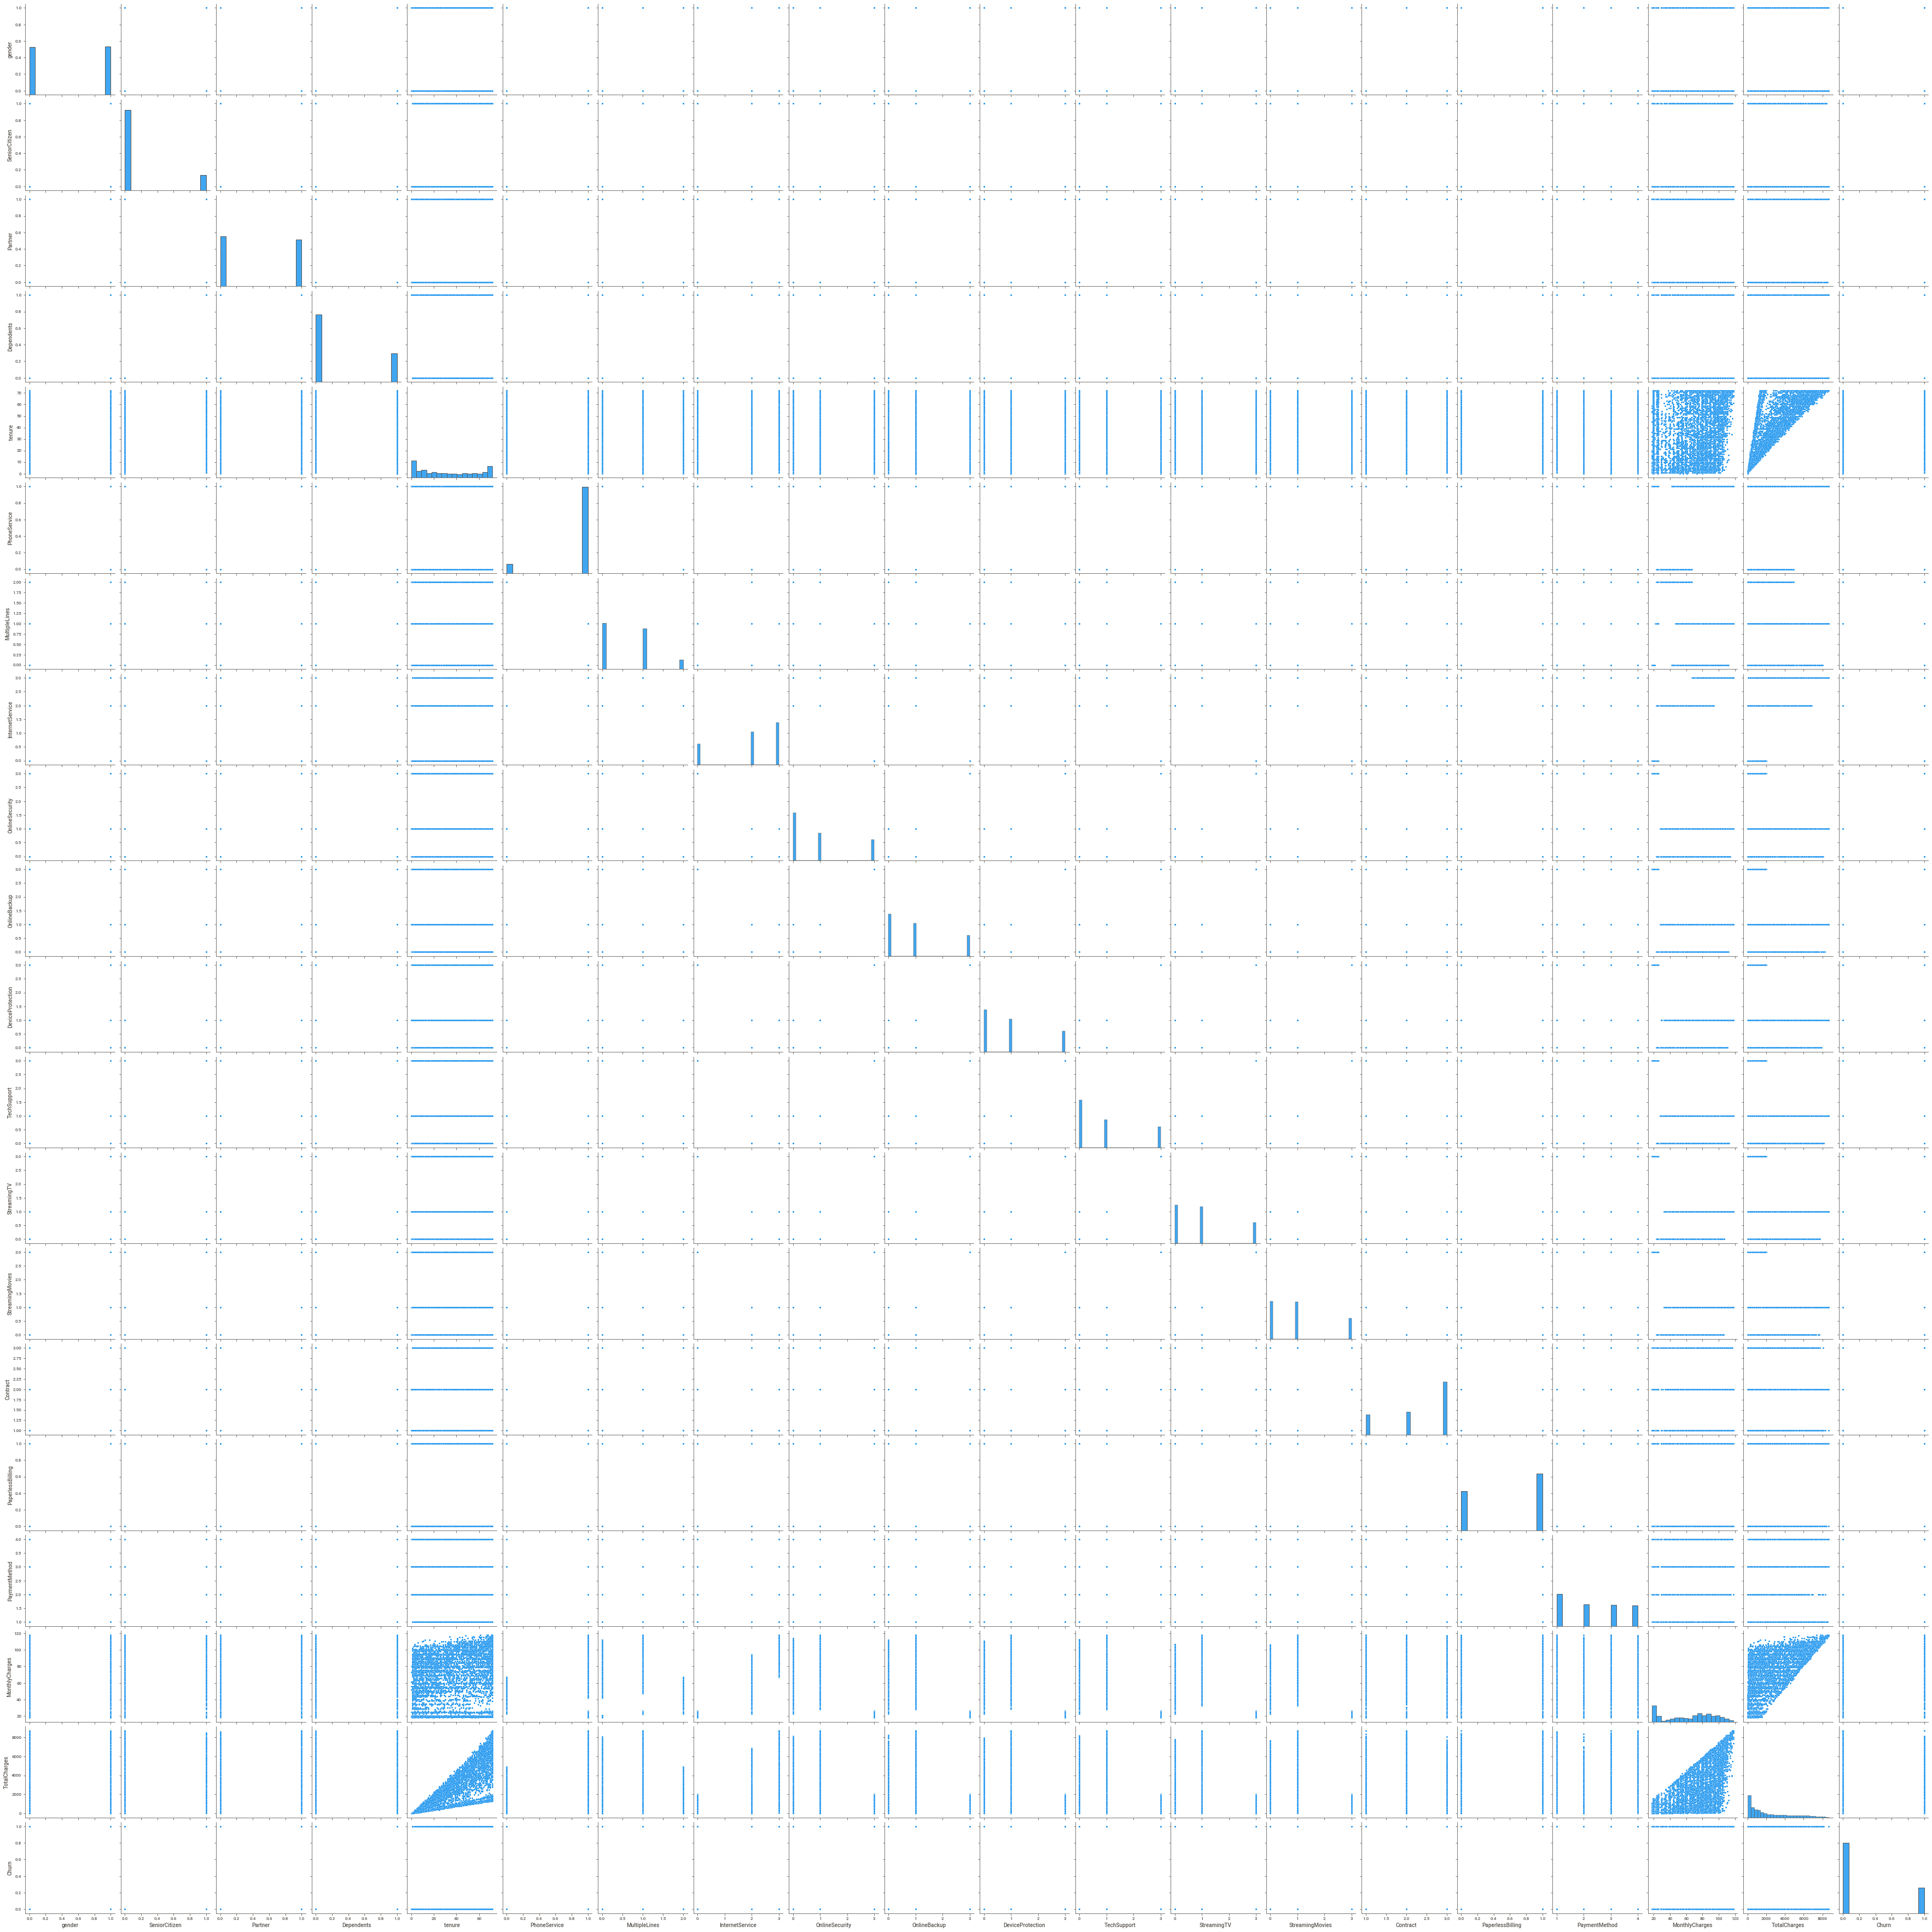

In [103]:
PP = sns.pairplot(TC)
PP

4. Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’ command 
Contrast the training vs test datasets on the target (‘churn’)


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
# get the locations
X = TC.iloc[:, :-1]
y = TC.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [105]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2920,0,0,1,0,72,1,0,2,1,1,1,1,1,1,2,0,2,85,6155
2966,0,1,0,0,14,0,2,2,0,0,0,0,1,1,3,1,1,46,672
6099,0,0,1,1,71,1,1,0,3,3,3,3,3,3,2,0,3,24,1810
5482,1,0,1,1,33,1,0,2,0,0,1,1,1,1,1,1,2,73,2405
2012,0,0,1,0,47,1,1,3,1,1,1,0,1,0,3,1,1,98,4533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1,0,1,0,15,1,1,3,0,0,1,1,1,1,3,1,1,103,1539
3264,0,0,0,1,10,1,0,3,0,0,1,1,1,0,3,1,1,91,964
1653,1,0,1,0,58,1,0,0,3,3,3,3,3,3,2,0,2,20,1185
2607,1,1,0,0,1,1,0,3,0,0,0,0,0,0,3,1,1,69,69


In [106]:
import sweetviz as sv
analyze_report = sv.analyze(TC)
analyze_report.show_html('Project1675All.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report Project1675All.html was generated.



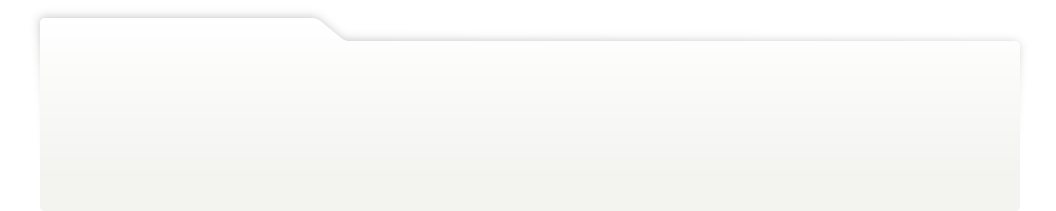
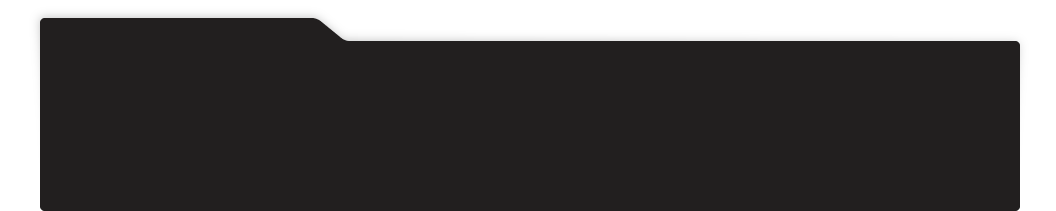
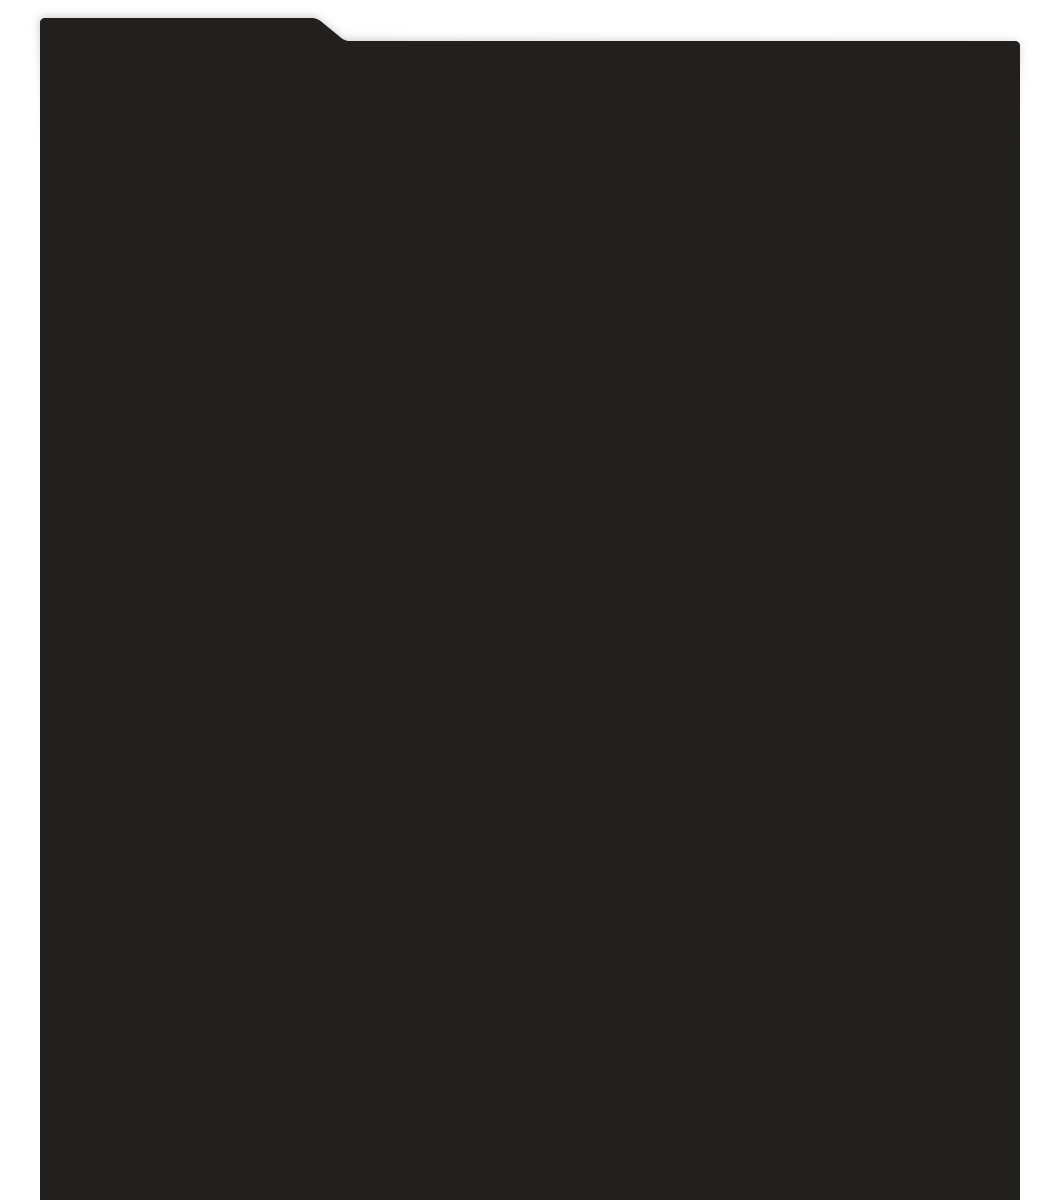
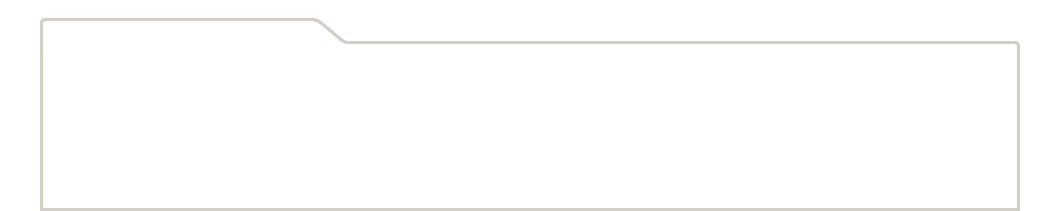
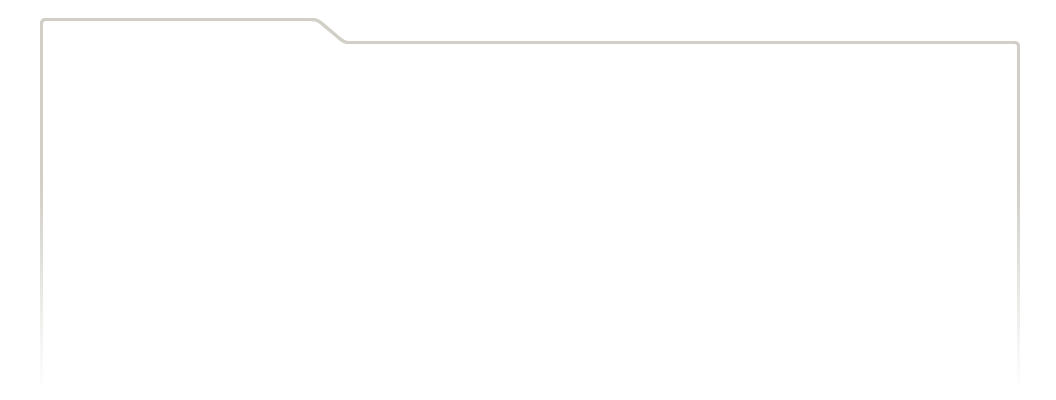
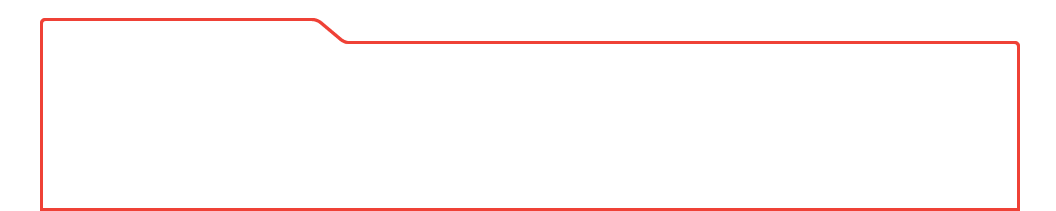
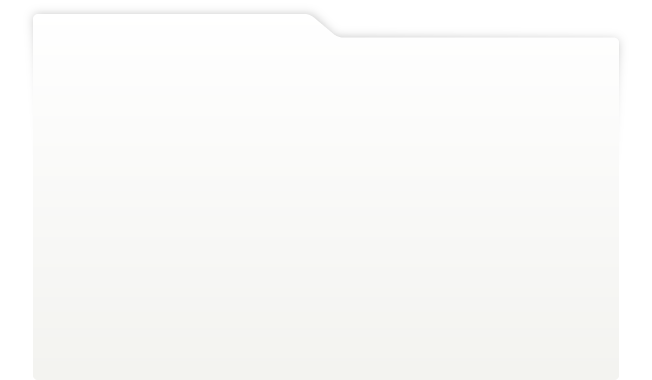
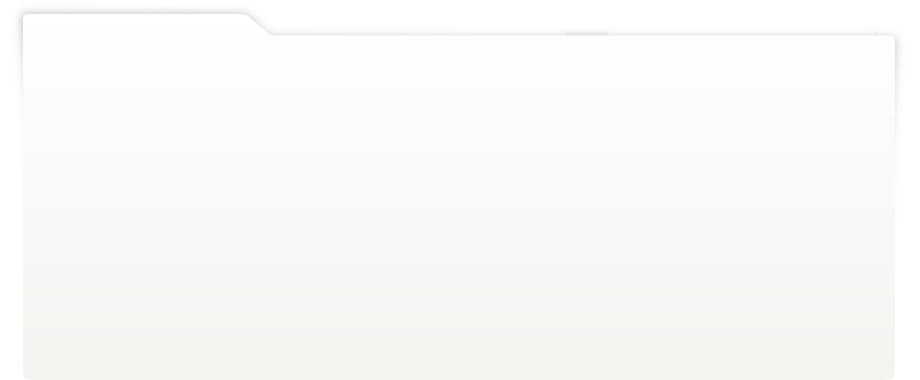
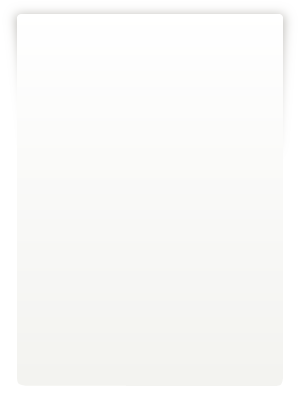
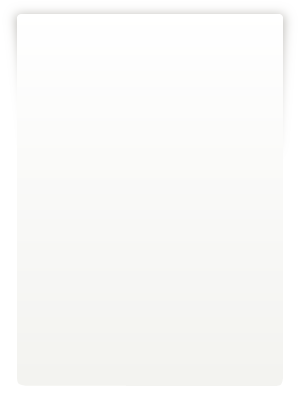
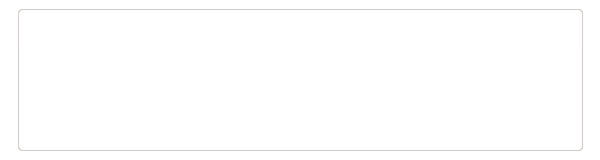
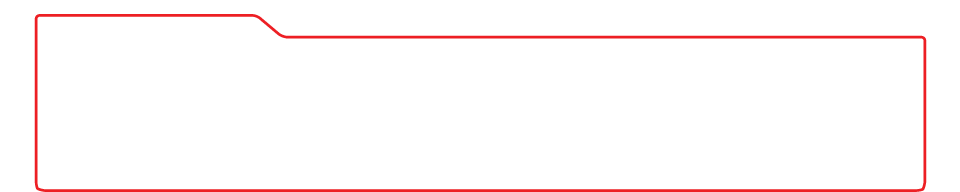
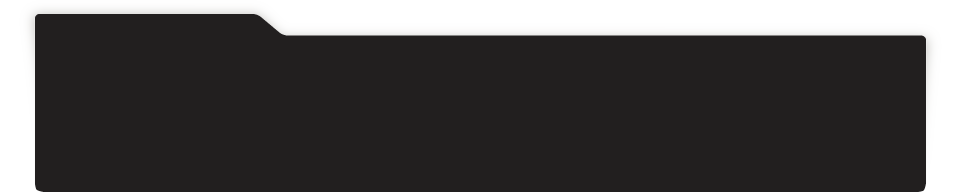
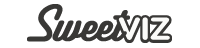
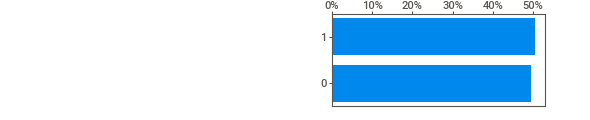
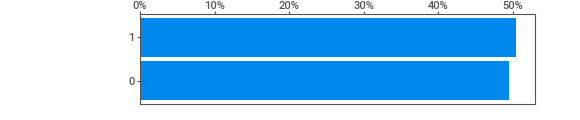
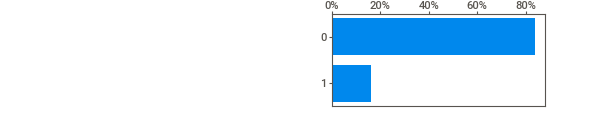
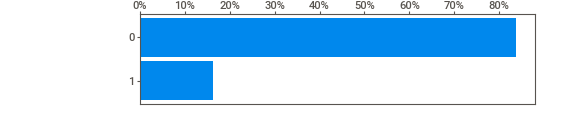
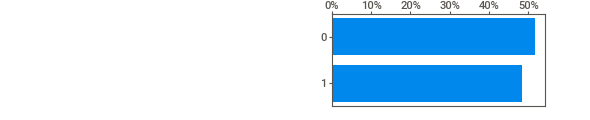
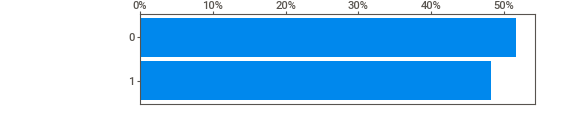
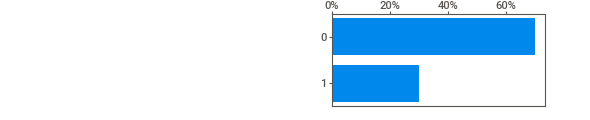
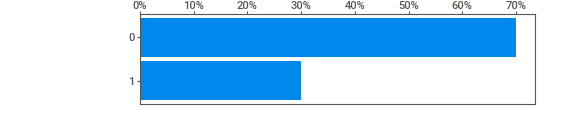
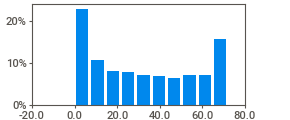
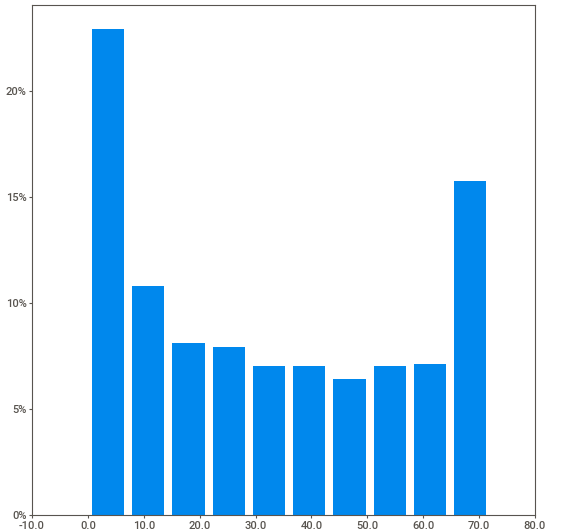
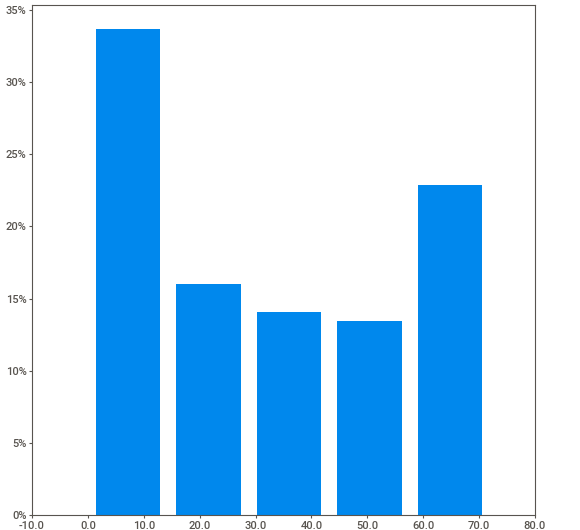
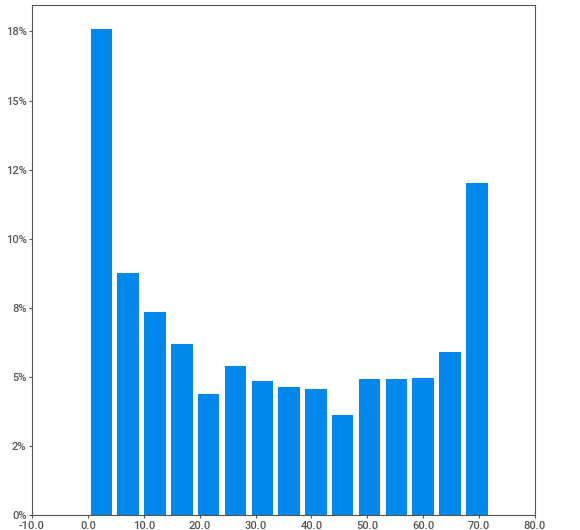
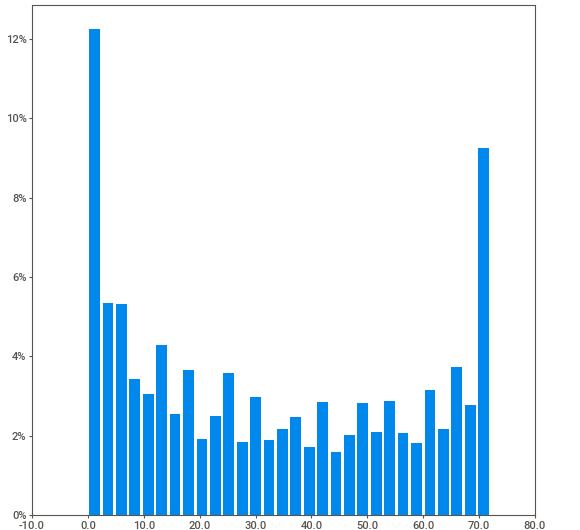
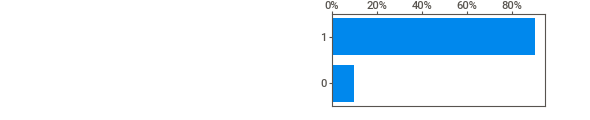
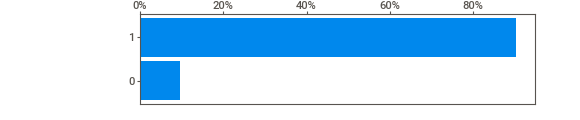
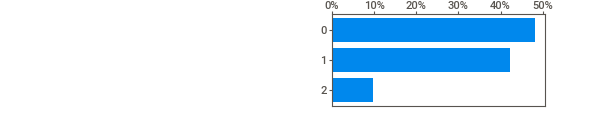
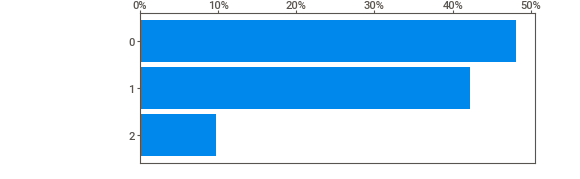
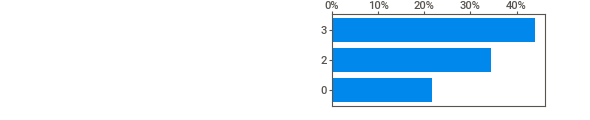
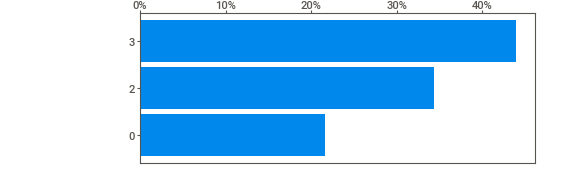
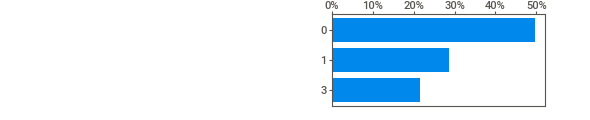
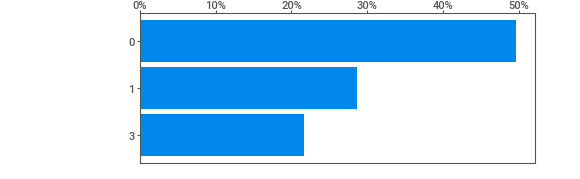
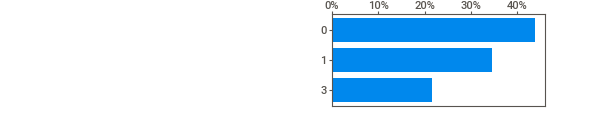
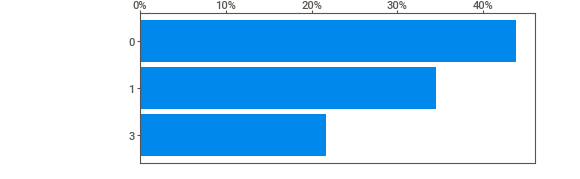
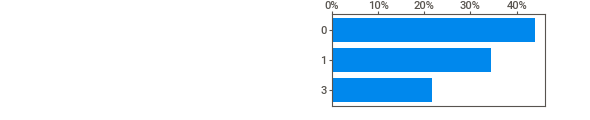
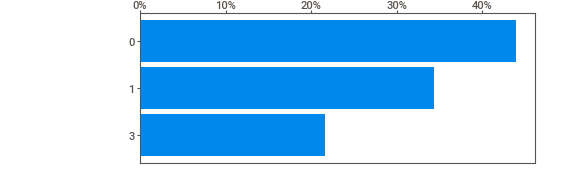
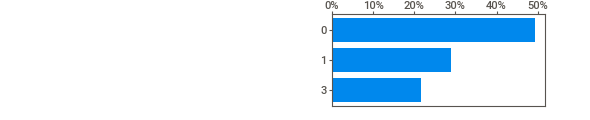
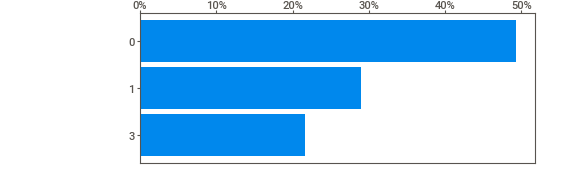
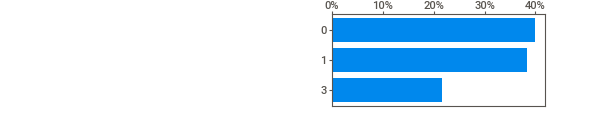
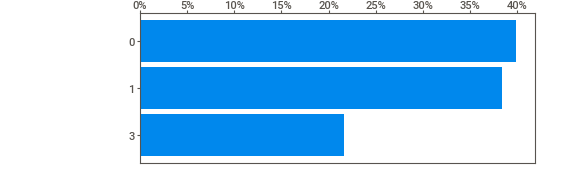
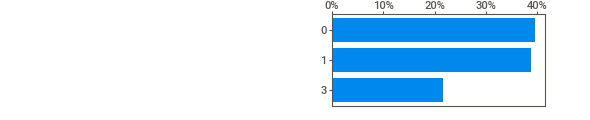
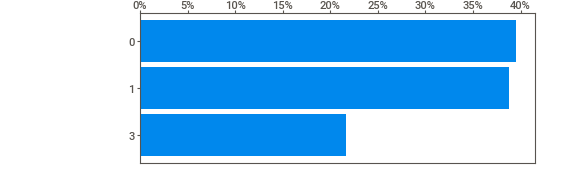
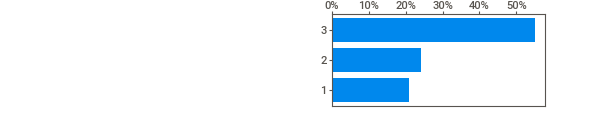
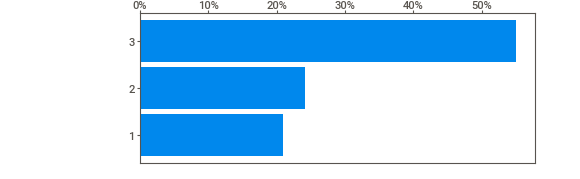
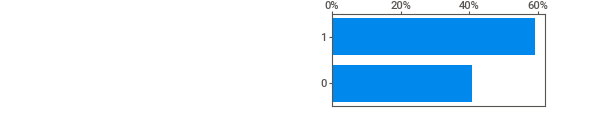
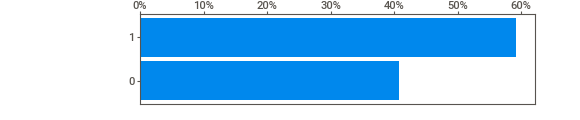
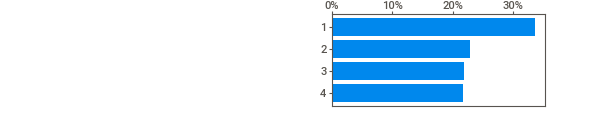
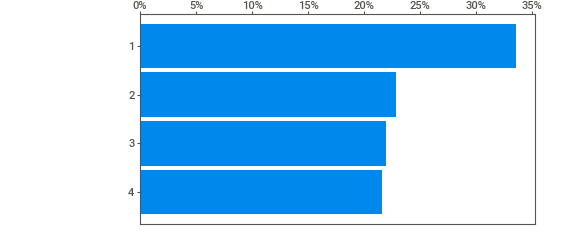
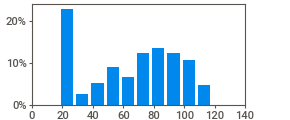
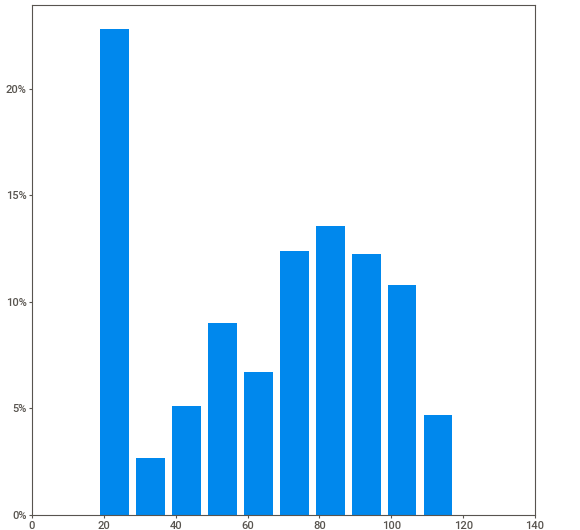
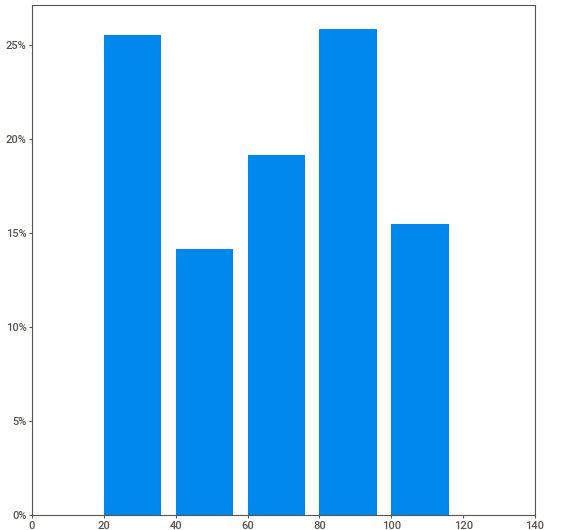
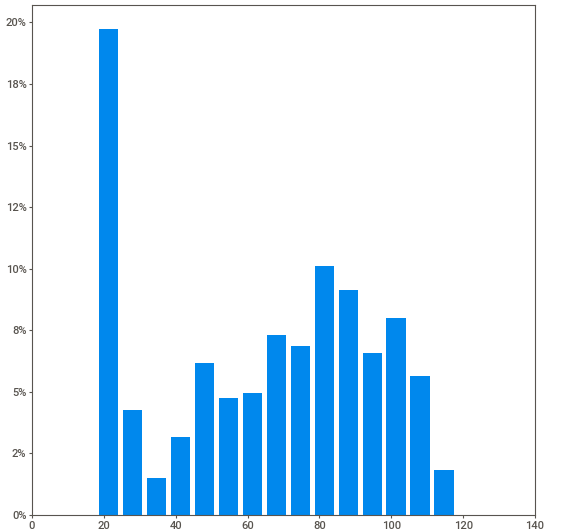
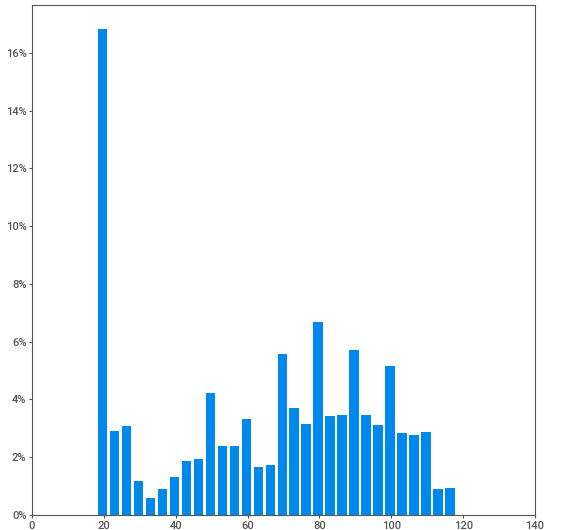
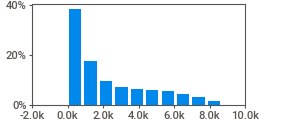
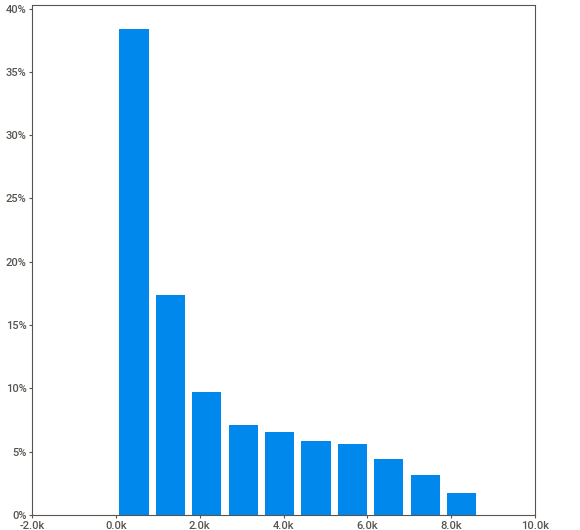
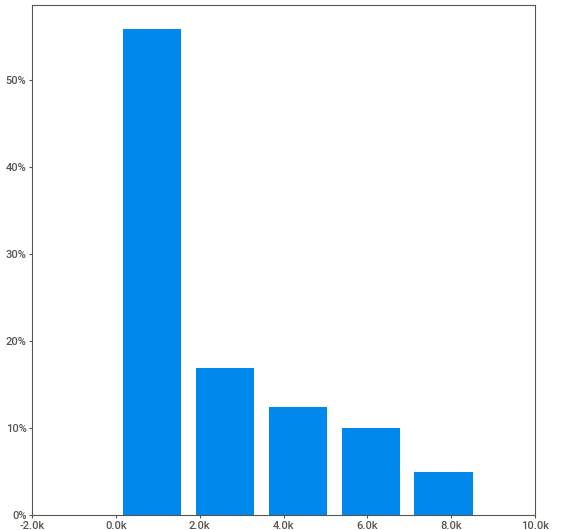
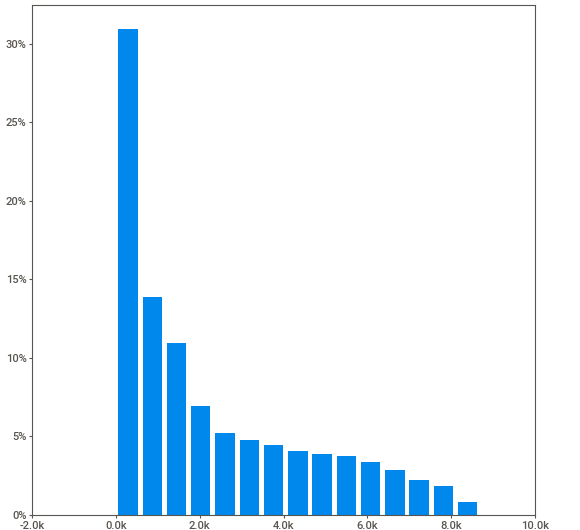
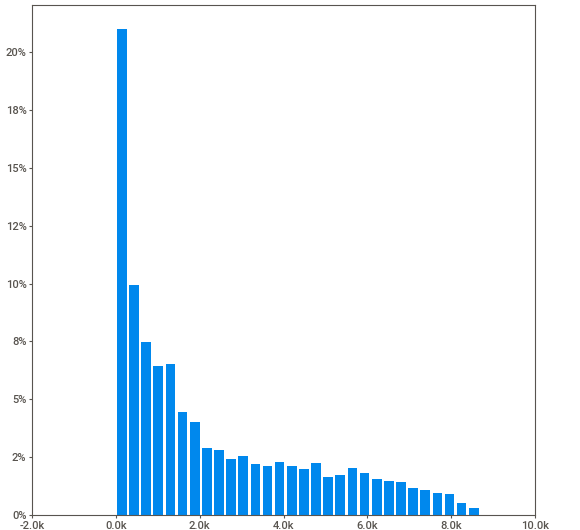
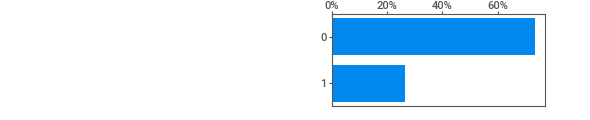
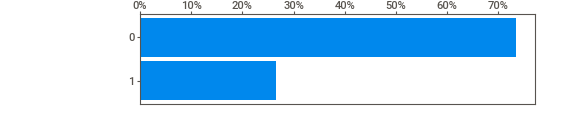
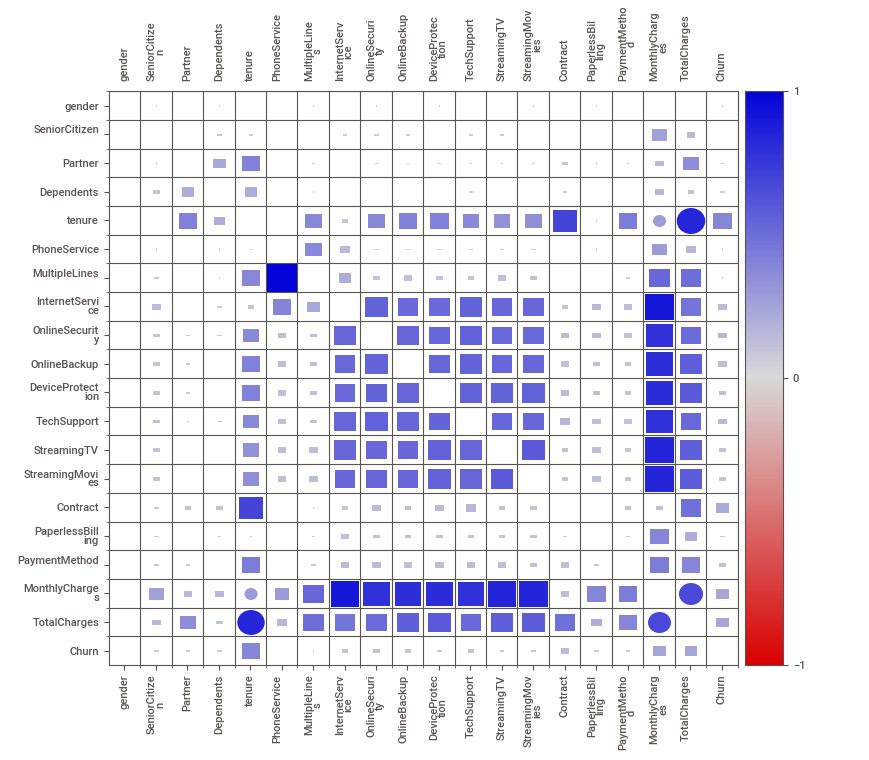
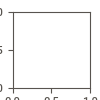

In [107]:
import IPython
IPython.display.HTML('Project1675All.html')

In [108]:
compare = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare.show_html('675compare.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report 675compare.html was generated.



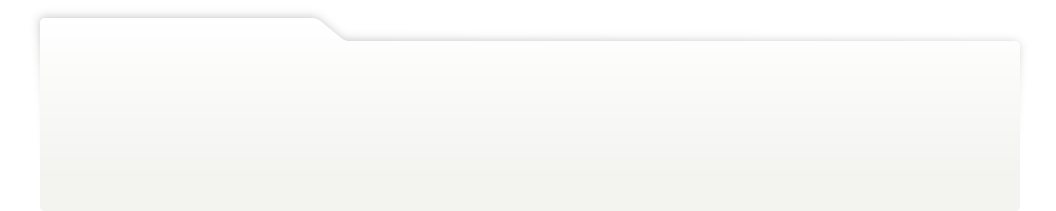
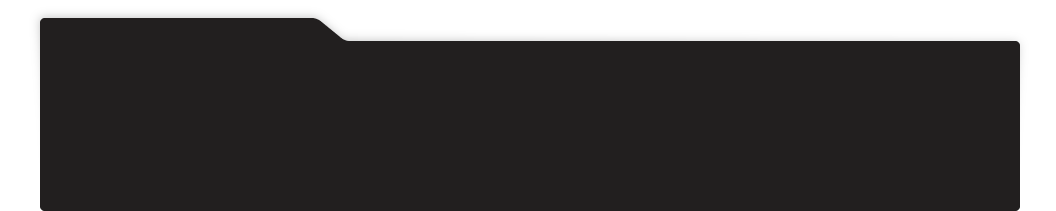
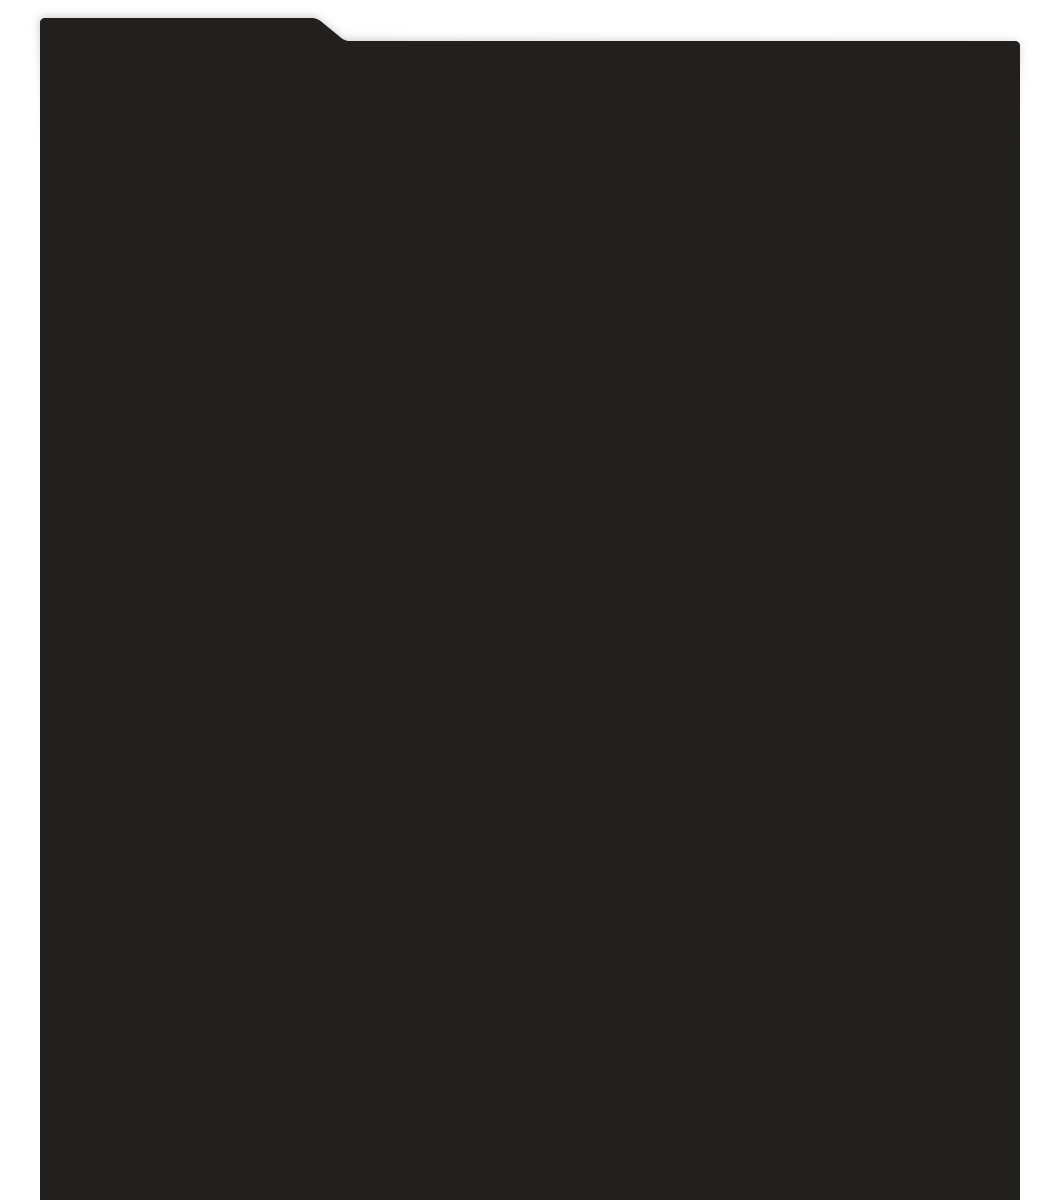
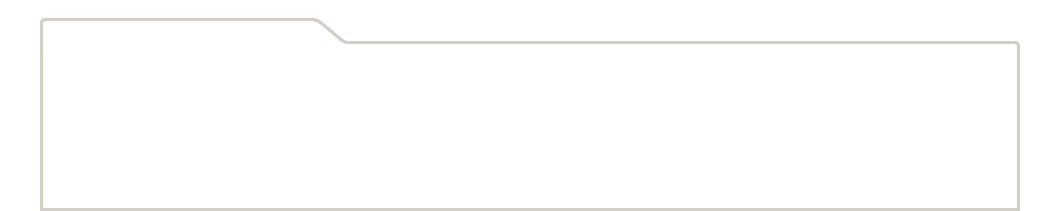
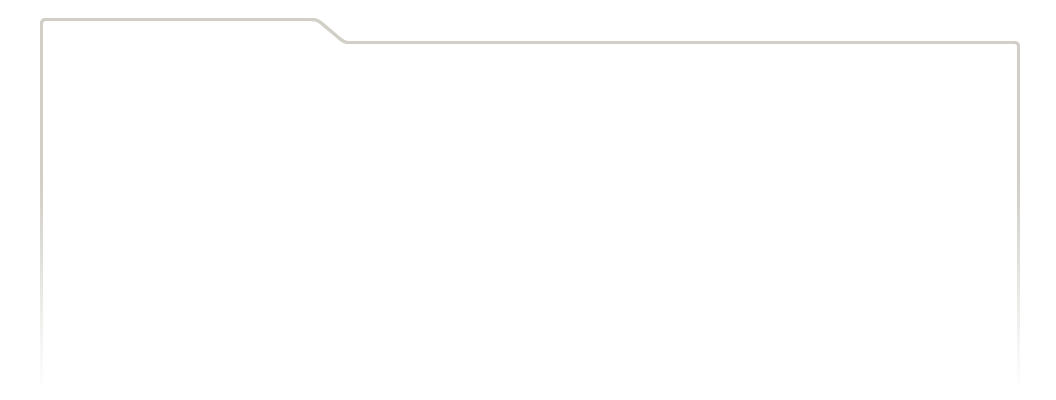
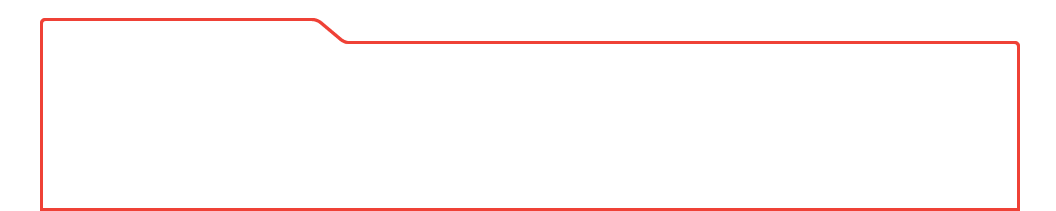
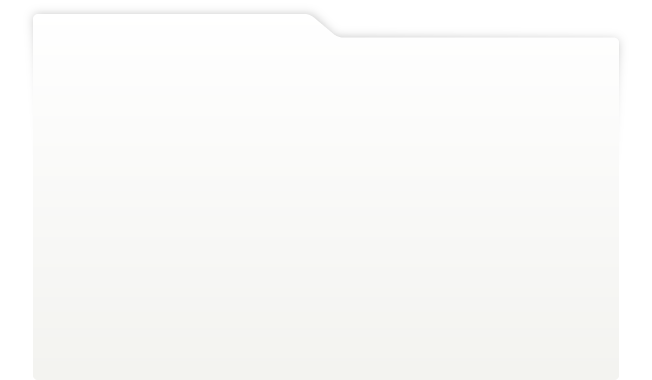
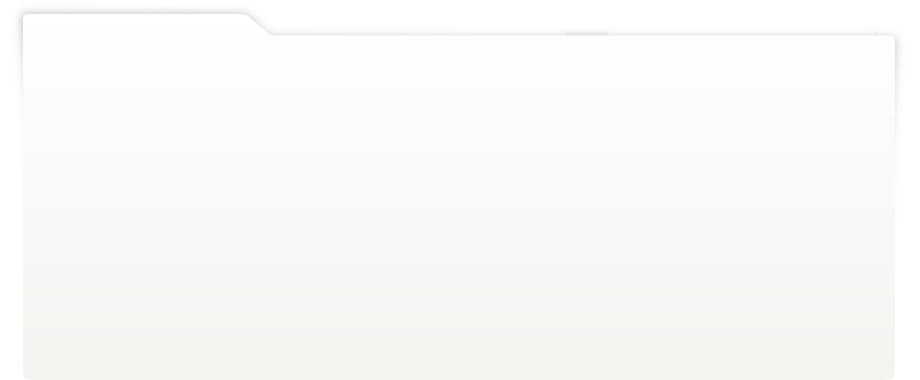
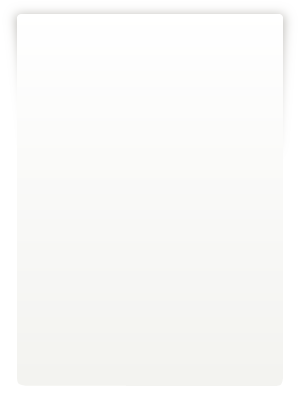
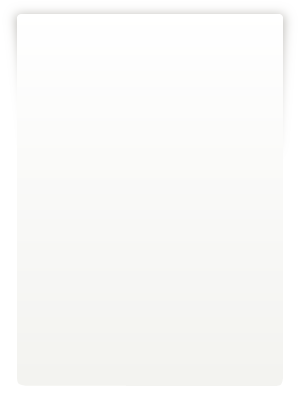
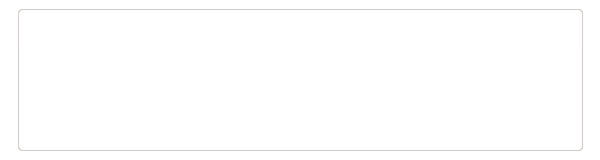
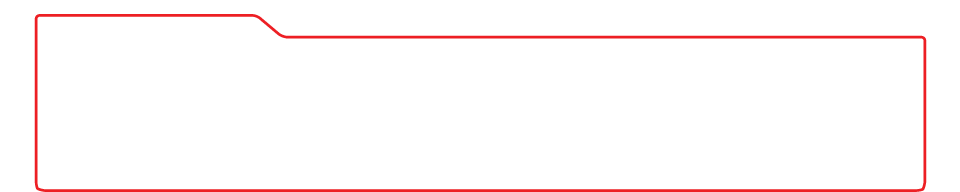
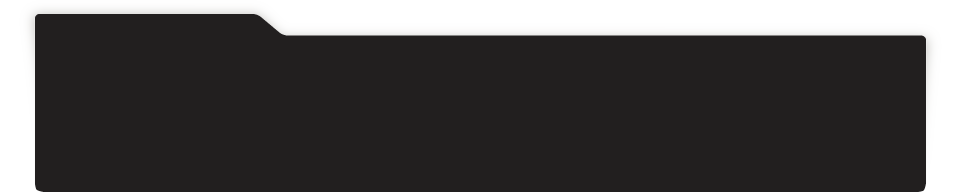
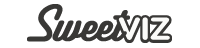
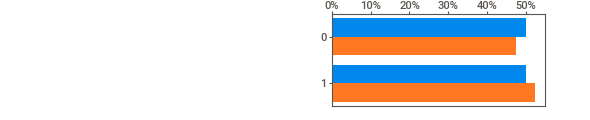
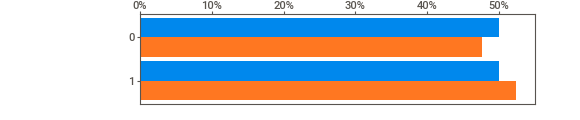
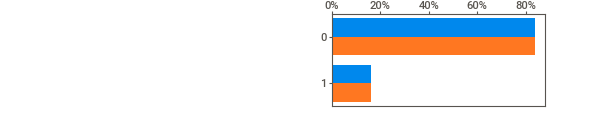
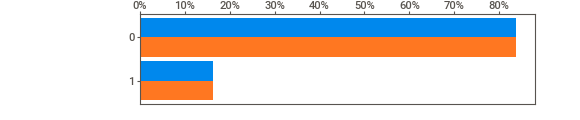
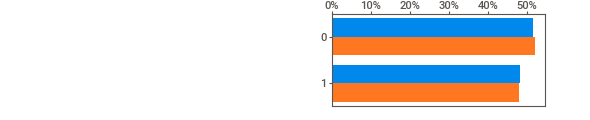
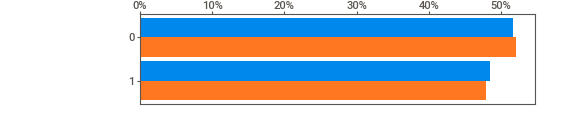
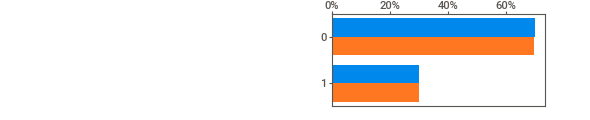
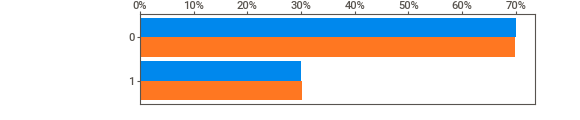
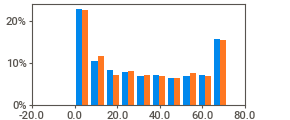
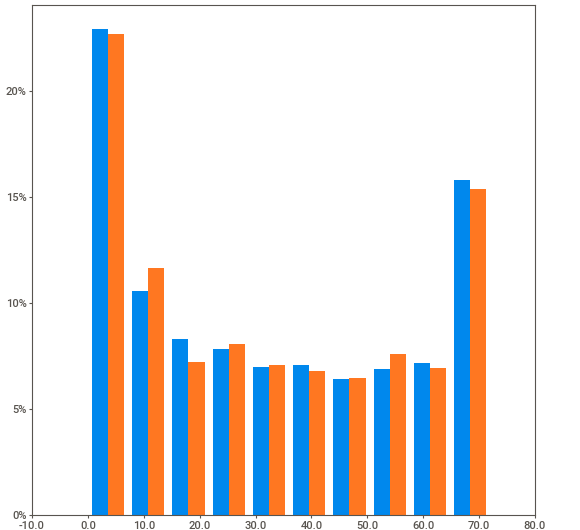
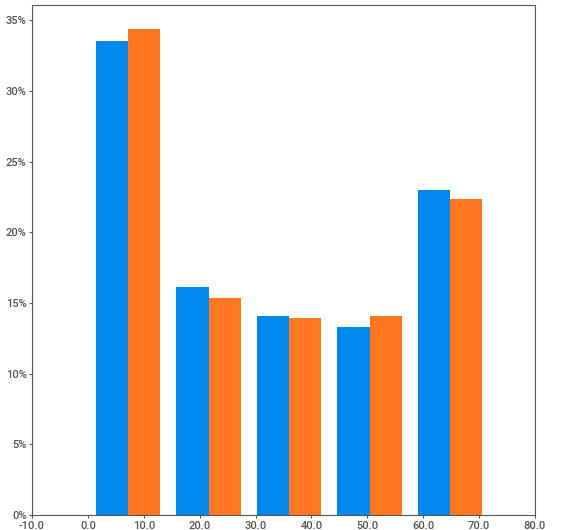
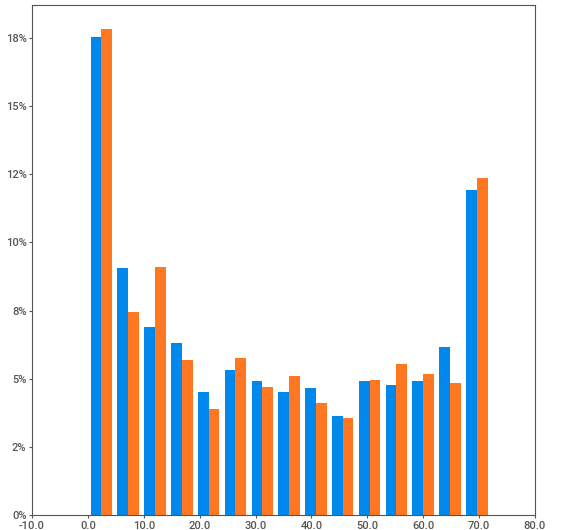
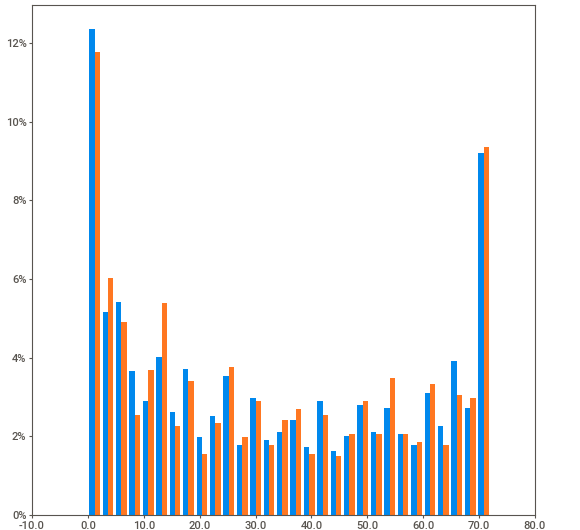
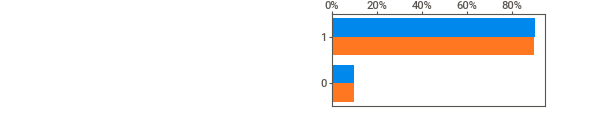
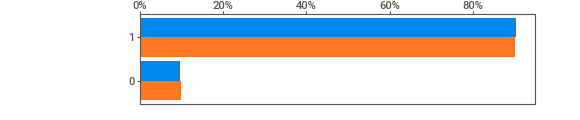
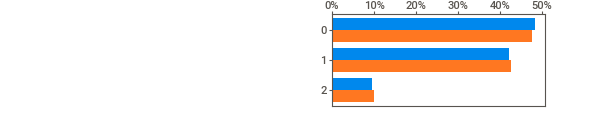
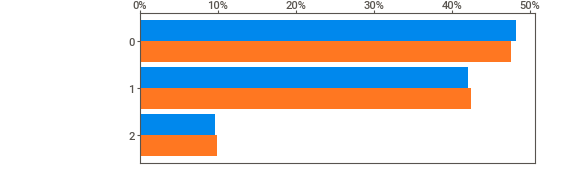
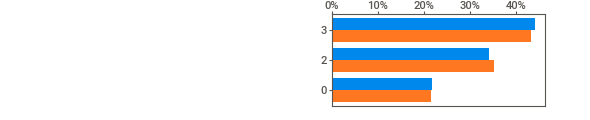
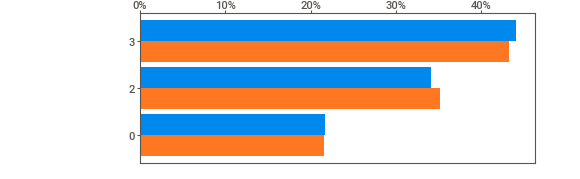
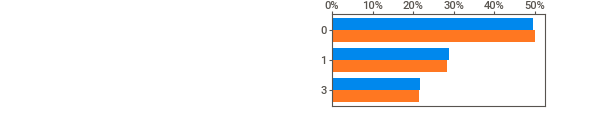
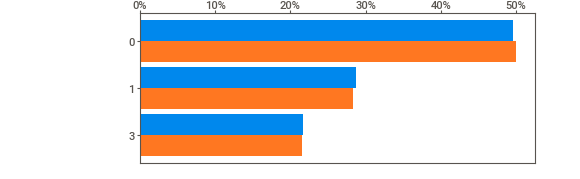
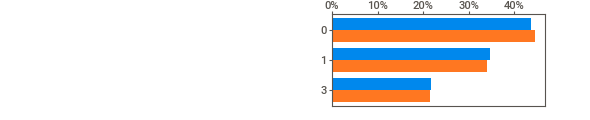
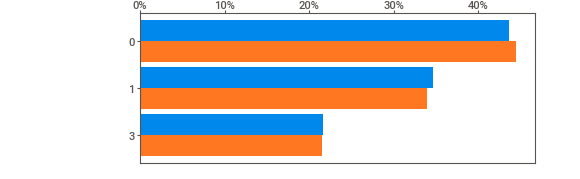
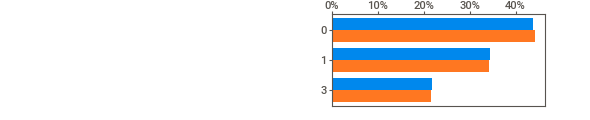
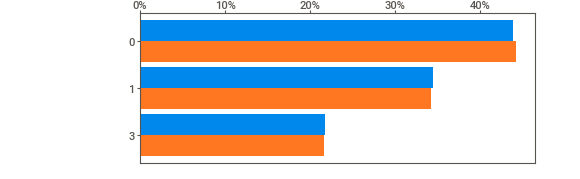
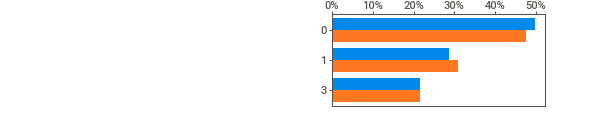
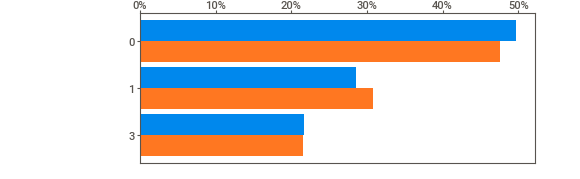
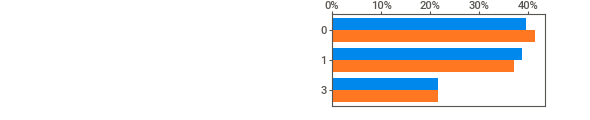
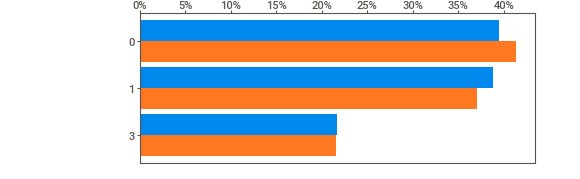
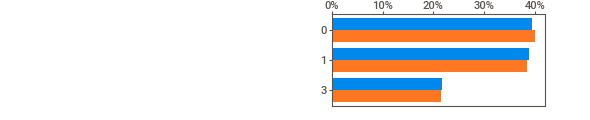
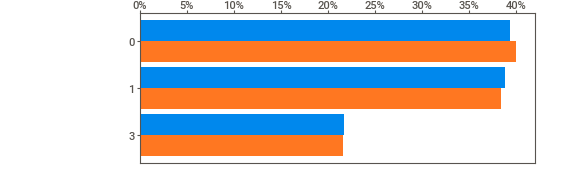
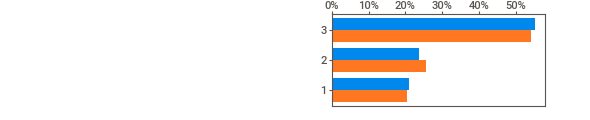
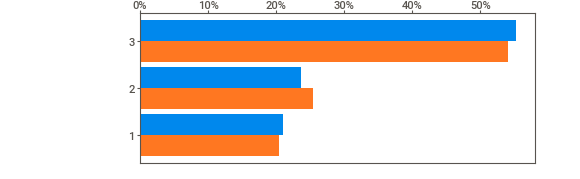
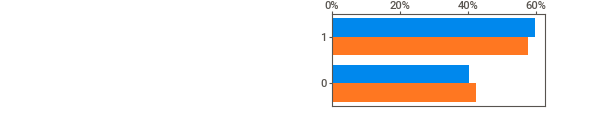
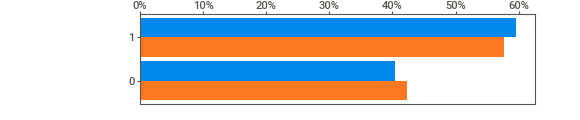
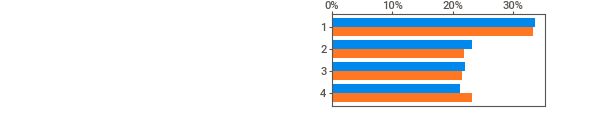
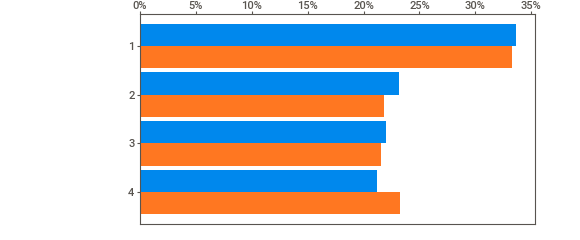
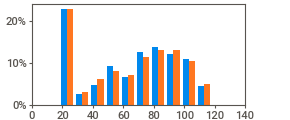
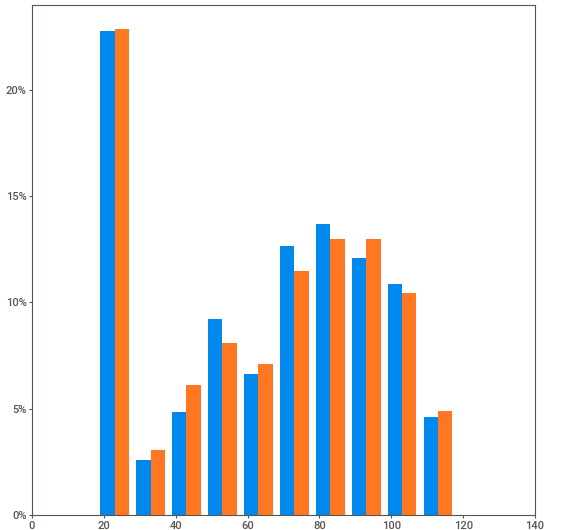
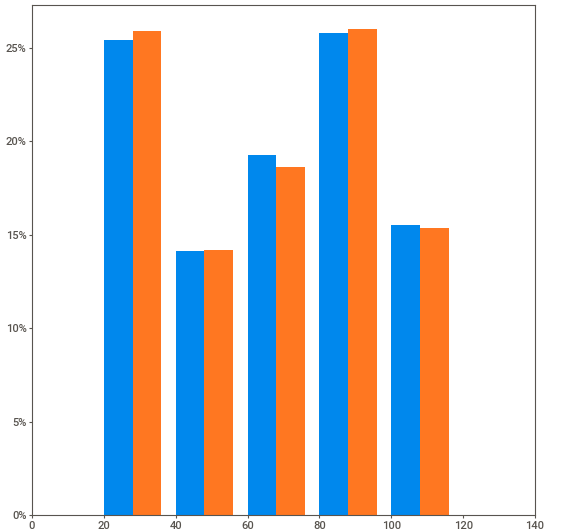
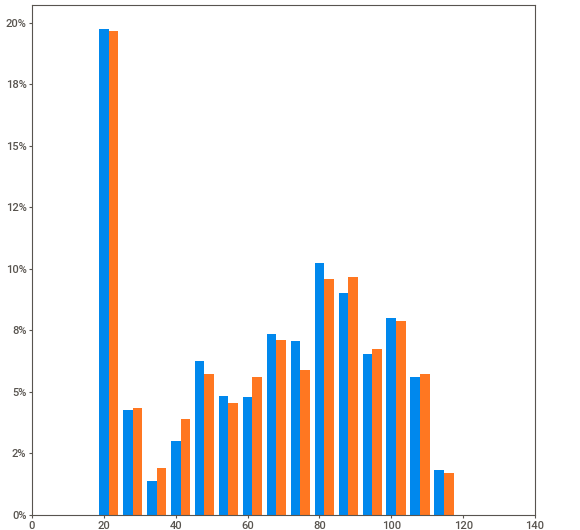
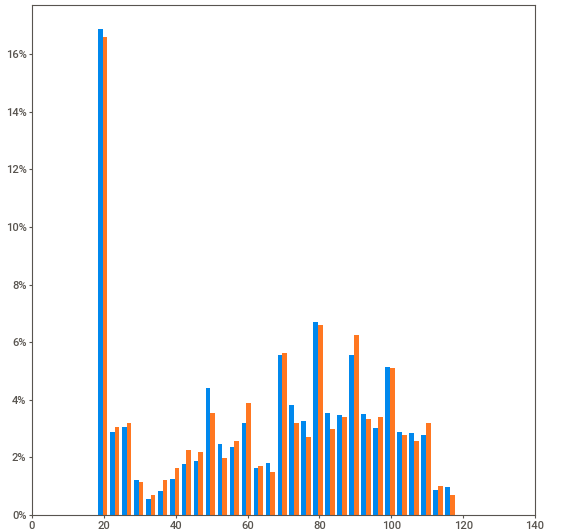
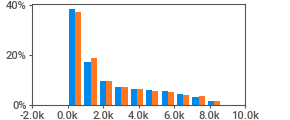
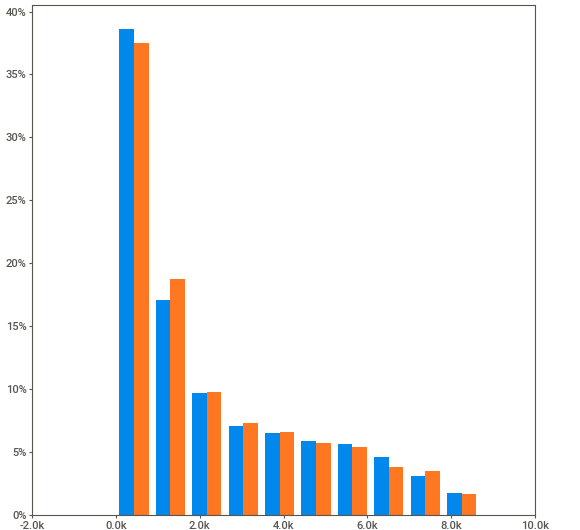
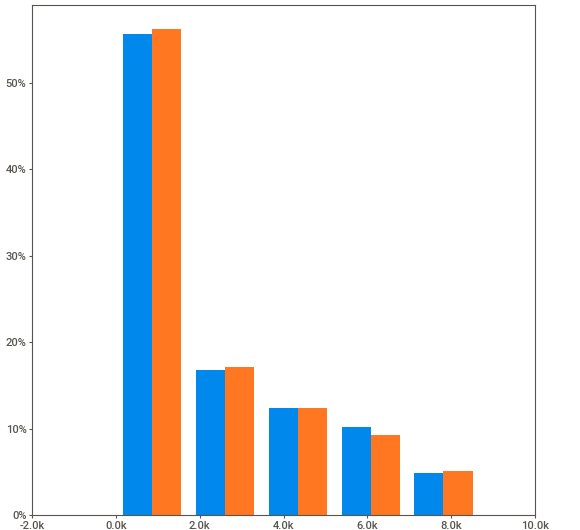
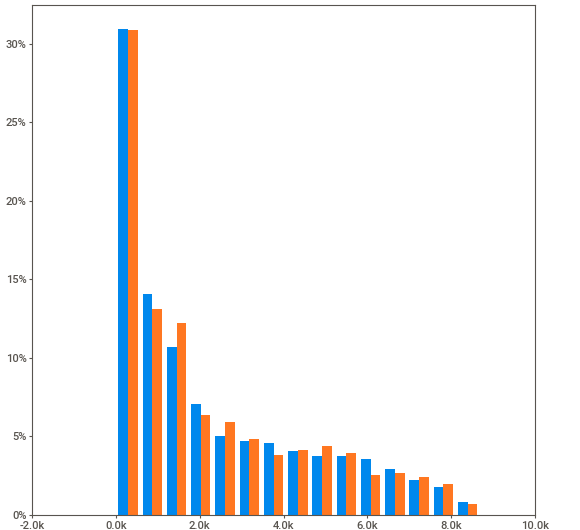
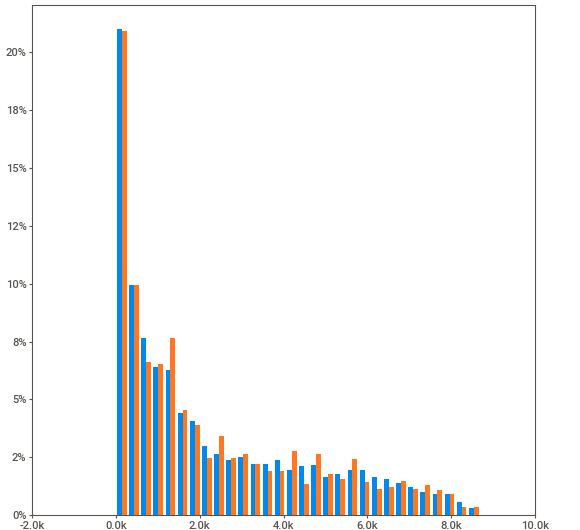
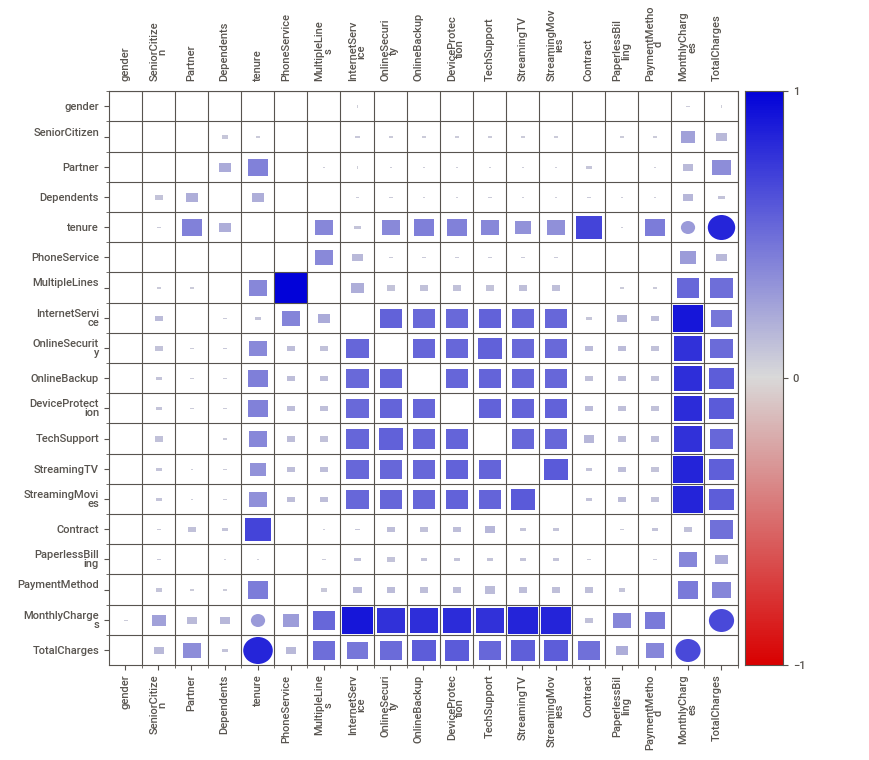
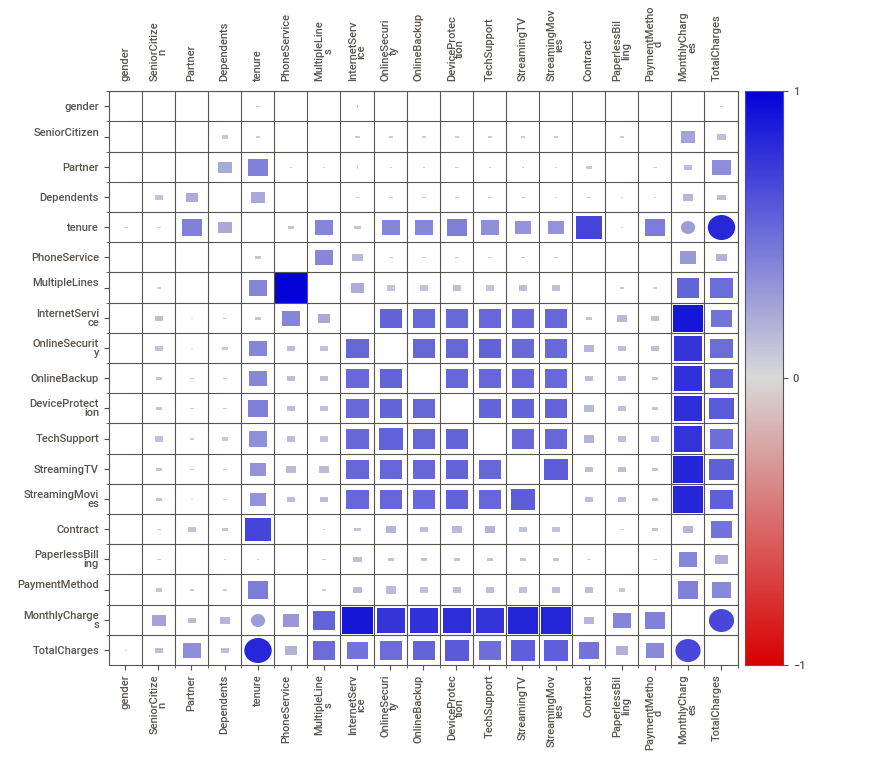

In [109]:
IPython.display.HTML('675compare.html')